In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
import os
import seaborn as sns
import pandas as pd
from skimage.filters import sobel,roberts, scharr, prewitt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from skimage.filters import sobel
from skimage.feature import graycomatrix, graycoprops
from skimage.measure import shannon_entropy
import xarray as xr
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage.filters import meijering, sato, frangi, hessian
import cv2
from scipy import ndimage as nd
from skimage import util, exposure, data
import pywt
from skimage.feature import greycomatrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import linear_model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 
from sklearn import metrics





In [ ]:
!gdown -q https://docs.google.com/spreadsheets/d/1iJO1lU3Iw7kbgC5rCS9TcVkC3XddHBnpvEF_nzJ6pnM/edit?usp=sharing -O All_features_combined_for_ML.csv


/usr/local/lib/python3.10/dist-packages/gdown/parse_url.py:35: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=None
  warnings.warn(


In [ ]:
url = "https://docs.google.com/spreadsheets/d/1Kidl_v2JYZ87CQ7gf25UNSH67bCayoed4V_Nayg8zow/edit?usp=share_link"
url_for_pandas = url.replace("/edit?usp=share_link", "/export?format=xlsx")
df = pd.read_excel(url_for_pandas)

In [ ]:
# All_features=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/All_features_combined_for_ML.csv')
# All_features=All_features.iloc[:,1:]
# All_features.head(5)

In [ ]:
All_features=df
All_features.shape

(7563, 359)

In [ ]:
my_arrays_final = np.load('/content/drive/MyDrive/Colab Notebooks/Augmented Data/numpy_data.npz', allow_pickle=True)

In [ ]:
# Extract the X_train, y_train, X_test, and y_test arrays from the data
X_train = my_arrays_final['X_train']
y_train = my_arrays_final['y_train']
X_test = my_arrays_final['X_test']
y_test = my_arrays_final['y_test']

In [ ]:
# Print the shapes of the data
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (6050, 100, 100, 1)
y_train shape: (6050,)
X_test shape: (1513, 100, 100, 1)
y_test shape: (1513,)


In [ ]:
#Reshaping images to a 100x100
X_train_r = X_train.reshape(X_train.shape[0], 100,100)
X_test_r = X_test.reshape (X_test. shape[0], 100, 100)

In [ ]:
Y=np.hstack((y_train,y_test))
Y.shape

(7563,)

In [ ]:
#Label Encoding
le = preprocessing.LabelEncoder()
le.fit(Y)
labels_encoded = le.transform(Y)
labels_encoded

array([2, 2, 0, ..., 0, 2, 2])

In [ ]:
All_features=All_features.iloc[:,1:]
All_features.columns = All_features.columns.map(str)
All_features.head(5)


,Bins_1,Bins_2,Bins_3,Bins_4,Bins_5,Bins_6,Bins_7,Bins_8,Bins_9,Bins_10,...,mu21,mu12,mu03,nu20,nu11,nu02,nu30,nu21,nu12,nu03
0,0.015075,0.046351,0.042569,0.030070,0.029692,0.049055,0.056624,0.040189,0.034678,0.040473,...,0.559661,0.426303,0.535747,0.077205,0.544002,0.160113,0.852666,0.706441,0.490703,0.445080
1,0.000317,0.000626,0.014063,0.023360,0.029115,0.073181,0.121795,0.130418,0.088579,0.116838,...,0.507501,0.483213,0.506857,0.065466,0.537889,0.130287,0.851439,0.702253,0.498181,0.442059
2,0.003015,0.007830,0.005321,0.007455,0.018737,0.041415,0.070513,0.039401,0.036562,0.070256,...,0.523291,0.439590,0.484505,0.067712,0.541553,0.137352,0.850137,0.703412,0.493113,0.440459
3,0.000317,0.001566,0.003421,0.008698,0.023350,0.033776,0.030449,0.030339,0.023370,0.030164,...,0.418689,0.551146,0.496898,0.062324,0.544837,0.126923,0.852111,0.696625,0.505535,0.441356
4,0.000952,0.007830,0.084759,0.124751,0.136062,0.259349,0.360043,0.229708,0.097248,0.083620,...,0.285359,0.445845,0.630891,0.051830,0.593454,0.266290,0.840995,0.671925,0.487977,0.465933


In [ ]:
#Spliting data into train, testidation and test datasets 
x_train, x_test,y_train, y_test = train_test_split(All_features, labels_encoded, test_size=0.30, random_state=123, shuffle = True, stratify = labels_encoded)
x_val, x_test,y_val, y_test = train_test_split(x_test, y_test, test_size=0.50, random_state=1, shuffle = True, stratify = y_test)
x_train.shape , y_train.shape , x_val.shape , y_val.shape , x_test.shape , y_test.shape

((5294, 358), (5294,), (1134, 358), (1134,), (1135, 358), (1135,))

In [ ]:
lda = LDA()

In [ ]:
lda.fit(x_train,y_train)

LinearDiscriminantAnalysis()

In [ ]:
#Predict on train
train_prediction = lda.predict(x_train)
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(y_train, train_prediction))
print ("Accuracy = ", classification_report(y_train, train_prediction))

Accuracy =  0.6142803173403854
Accuracy =                precision    recall  f1-score   support

           0       0.68      0.68      0.68      1735
           1       0.53      0.50      0.52      1766
           2       0.63      0.66      0.64      1793

    accuracy                           0.61      5294
   macro avg       0.61      0.61      0.61      5294
weighted avg       0.61      0.61      0.61      5294



In [ ]:
#Predict on val
# val_PCA = pca.transform(x_val) 
val_prediction = lda.predict(x_val)
#Print overall accuracy
print ("Accuracy = ", metrics.accuracy_score(y_val, val_prediction))
print ("Accuracy = ", classification_report(y_val, val_prediction))

Accuracy =  0.5582010582010583
Accuracy =                precision    recall  f1-score   support

           0       0.67      0.62      0.65       372
           1       0.44      0.43      0.43       378
           2       0.57      0.62      0.60       384

    accuracy                           0.56      1134
   macro avg       0.56      0.56      0.56      1134
weighted avg       0.56      0.56      0.56      1134



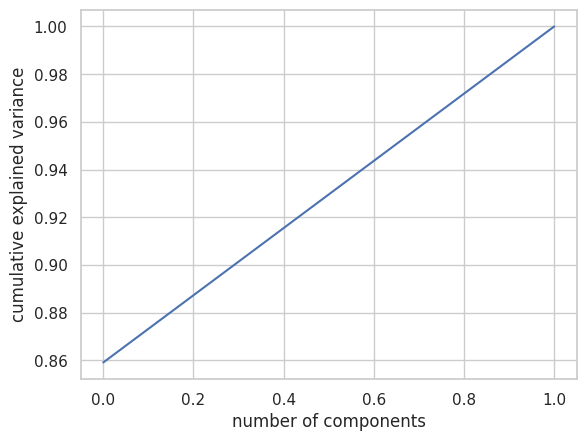

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.859152,0.859152
1,1.000000,0.140848


In [ ]:
lda_test = LDA(n_components=None)
lda_test.fit(x_train, y_train)

sns.set(style='whitegrid')
plt.plot(np.cumsum(lda_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
display(plt.show())

evr = lda_test.explained_variance_ratio_
cvr = np.cumsum(lda_test.explained_variance_ratio_)

lda_df = pd.DataFrame()
lda_df['Cumulative Variance Ratio'] = cvr
lda_df['Explained Variance Ratio'] = evr
display(lda_df.head(15))

In [ ]:
lda = LDA(n_components=2)
X_train = lda.fit_transform(x_train, y_train)
X_val = lda.transform(x_val)

In [ ]:
X_test = lda.transform(x_test)

In [ ]:
X_train.shape

(5294, 2)

In [ ]:
X_train.shape

(5294, 2)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'C': [ 0.1, 1, 10, 100, 1000], 
     'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
     'kernel': ['rbf']},
    {'C': [0.1, 1, 10, 100, 1000],
     'kernel': ['linear']},
]
grid = GridSearchCV(SVC(), param_grid, verbose=2)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time=   1.2s
[CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time=   1.2s
[CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time=   1.2s
[CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time=   1.2s
[CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time=   1.2s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   1.3s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   2.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   2.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   1.3s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   1.2s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.9s
[CV] END ......................C=0.1, gamma=0.0

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [0.1, 1, 10, 100, 1000],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
                          'kernel': ['rbf']},
                         {'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']}],
             verbose=2)

In [ ]:
y_pred = grid.predict(X_val)

In [ ]:
grid

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 10, None],
                         'max_features': [1, 3, 5, 10],
                         'min_samples_leaf': [1, 2, 10],
                         'min_samples_split': [1, 2, 10],
                         'n_estimators': [10, 50, 200]},
             scoring='accuracy')

In [ ]:
grid.best_estimator_

RandomForestClassifier(max_depth=3, max_features=5, min_samples_leaf=10,
                       n_estimators=10)

In [ ]:
y_pred = grid.predict(X_train)

In [ ]:
from sklearn import metrics
print('Confusion matrix:\n', metrics.confusion_matrix(y_train, y_pred))
print('Accuracy:', np.round(metrics.accuracy_score(y_train, y_pred), 4))
print(metrics.classification_report(y_train, y_pred)) # Better for multiclass problem

Confusion matrix:
 [[1174  295  266]
 [ 366  784  616]
 [ 156  341 1296]]
Accuracy: 0.6147
              precision    recall  f1-score   support

           0       0.69      0.68      0.68      1735
           1       0.55      0.44      0.49      1766
           2       0.60      0.72      0.65      1793

    accuracy                           0.61      5294
   macro avg       0.61      0.61      0.61      5294
weighted avg       0.61      0.61      0.61      5294



In [ ]:
y_pred = grid.predict(X_test)
print('Confusion matrix:\n', metrics.confusion_matrix(y_test, y_pred))
print('Accuracy:', np.round(metrics.accuracy_score(y_test, y_pred), 4))
print(metrics.classification_report(y_test, y_pred)) # Better for multiclass problem

Confusion matrix:
 [[240  77  55]
 [ 82 143 153]
 [ 52  88 245]]
Accuracy: 0.5533
              precision    recall  f1-score   support

           0       0.64      0.65      0.64       372
           1       0.46      0.38      0.42       378
           2       0.54      0.64      0.58       385

    accuracy                           0.55      1135
   macro avg       0.55      0.55      0.55      1135
weighted avg       0.55      0.55      0.55      1135



In [ ]:
from sklearn import metrics
print('Confusion matrix:\n', metrics.confusion_matrix(y_val, y_pred))
print('Accuracy:', np.round(metrics.accuracy_score(y_val, y_pred), 4))
print(metrics.classification_report(y_val, y_pred)) # Better for multiclass problem

Confusion matrix:
 [[231  96  45]
 [ 78 160 140]
 [ 33 108 243]]
Accuracy: 0.5591
              precision    recall  f1-score   support

           0       0.68      0.62      0.65       372
           1       0.44      0.42      0.43       378
           2       0.57      0.63      0.60       384

    accuracy                           0.56      1134
   macro avg       0.56      0.56      0.56      1134
weighted avg       0.56      0.56      0.56      1134



<ipython-input-190-75e6a411adee>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


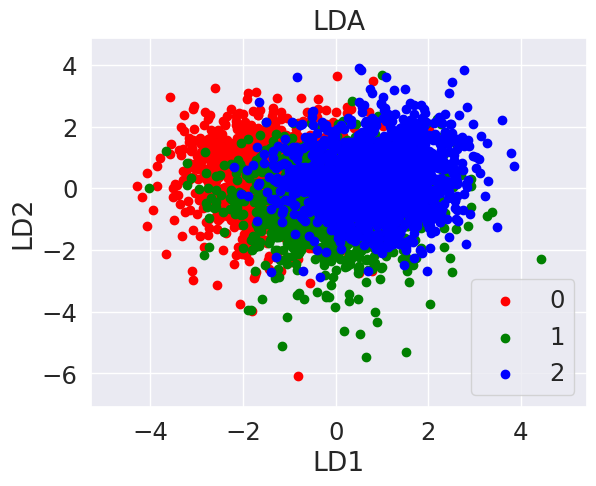

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
# plt.contourf(X1, X2, grid.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('LDA')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

In [ ]:
y_pred = grid.predict(X_test)

In [ ]:
# Confusion matrix:
#  [[240  92  40]
#  [ 83 168 127]
#  [ 52 107 226]]
# Accuracy: 0.5586
#               precision    recall  f1-score   support

#            0       0.64      0.65      0.64       372
#            1       0.46      0.44      0.45       378
#            2       0.58      0.59      0.58       385

#     accuracy                           0.56      1135
#    macro avg       0.56      0.56      0.56      1135
# weighted avg       0.56      0.56      0.56      1135

In [ ]:
from sklearn import metrics
print('Confusion matrix:\n', metrics.confusion_matrix(y_test, y_pred))
print('Accuracy:', np.round(metrics.accuracy_score(y_test, y_pred), 4))
print(metrics.classification_report(y_test, y_pred)) # Better for multiclass problem

Confusion matrix:
 [[240  92  40]
 [ 83 168 127]
 [ 52 107 226]]
Accuracy: 0.5586
              precision    recall  f1-score   support

           0       0.64      0.65      0.64       372
           1       0.46      0.44      0.45       378
           2       0.58      0.59      0.58       385

    accuracy                           0.56      1135
   macro avg       0.56      0.56      0.56      1135
weighted avg       0.56      0.56      0.56      1135



<ipython-input-63-13213e9eedbd>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


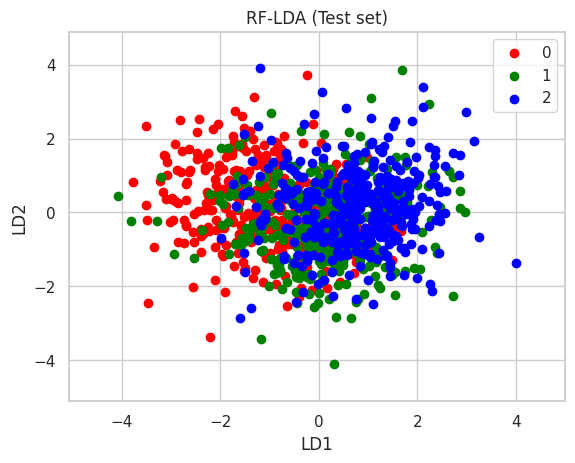

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
# plt.contourf(X1, X2, grid.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('RF-LDA (Test set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

In [ ]:
from sklearn import linear_model
mul_lr = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg',C=0.3593813663804626, max_iter=1000)
mul_lr.fit(X_train, y_train)

In [ ]:
mul_lr = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg',C=0.3593813663804626, max_iter=1000)

In [ ]:
mul_lr.fit(X_train, y_train)

LogisticRegression(C=0.3593813663804626, max_iter=1000,
                   multi_class='multinomial', solver='newton-cg')

In [ ]:
# from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
logModel = LogisticRegression()

In [ ]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [1000]
    }
]

In [ ]:
clf = GridSearchCV(logModel, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [ ]:
best_clf = clf.fit(X_train,y_train)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
540 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: So

In [ ]:
best_clf.best_estimator_


LogisticRegression(C=0.012742749857031334, max_iter=1000)

In [ ]:
mul_lr = linear_model.LogisticRegression(C=0.012742749857031334, max_iter=1000)
mul_lr.fit(X_train, y_train)

LogisticRegression(C=0.012742749857031334, max_iter=1000)

In [ ]:
y_pred = mul_lr.predict(X_train)

In [ ]:
from sklearn import metrics
print('Confusion matrix:\n', metrics.confusion_matrix(y_train, y_pred))
print('Accuracy:', np.round(metrics.accuracy_score(y_train, y_pred), 4))
print(metrics.classification_report(y_train, y_pred)) # Better for multiclass problem

Confusion matrix:
 [[1193  339  203]
 [ 391  856  519]
 [ 187  414 1192]]
Accuracy: 0.6122
              precision    recall  f1-score   support

           0       0.67      0.69      0.68      1735
           1       0.53      0.48      0.51      1766
           2       0.62      0.66      0.64      1793

    accuracy                           0.61      5294
   macro avg       0.61      0.61      0.61      5294
weighted avg       0.61      0.61      0.61      5294



<ipython-input-106-24ebe5049d72>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


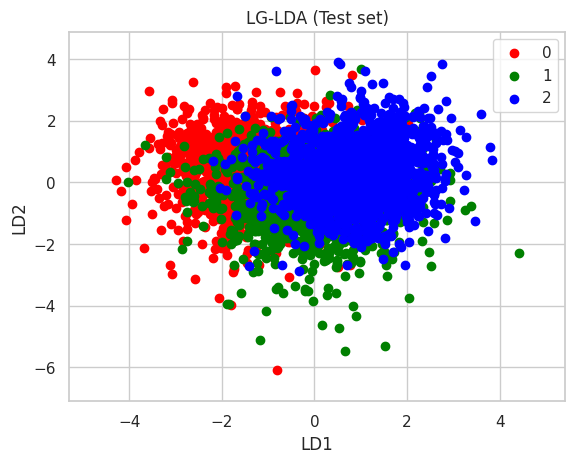

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
# plt.contourf(X1, X2, grid.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('LG-LDA (Test set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

In [ ]:
y_pred = mul_lr.predict(X_val)

In [ ]:
# Confusion matrix:
#  [[231  96  45]
#  [ 78 160 140]
#  [ 33 108 243]]
# Accuracy: 0.5591
#               precision    recall  f1-score   support

#            0       0.68      0.62      0.65       372
#            1       0.44      0.42      0.43       378
#            2       0.57      0.63      0.60       384

#     accuracy                           0.56      1134
#    macro avg       0.56      0.56      0.56      1134
# weighted avg       0.56      0.56      0.56      1134

In [ ]:
from sklearn import metrics
print('Confusion matrix:\n', metrics.confusion_matrix(y_val, y_pred))
print('Accuracy:', np.round(metrics.accuracy_score(y_val, y_pred), 4))
print(metrics.classification_report(y_val, y_pred)) # Better for multiclass problem

Confusion matrix:
 [[236  92  44]
 [ 82 159 137]
 [ 36 108 240]]
Accuracy: 0.56
              precision    recall  f1-score   support

           0       0.67      0.63      0.65       372
           1       0.44      0.42      0.43       378
           2       0.57      0.62      0.60       384

    accuracy                           0.56      1134
   macro avg       0.56      0.56      0.56      1134
weighted avg       0.56      0.56      0.56      1134



<ipython-input-115-86fc054d1db9>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


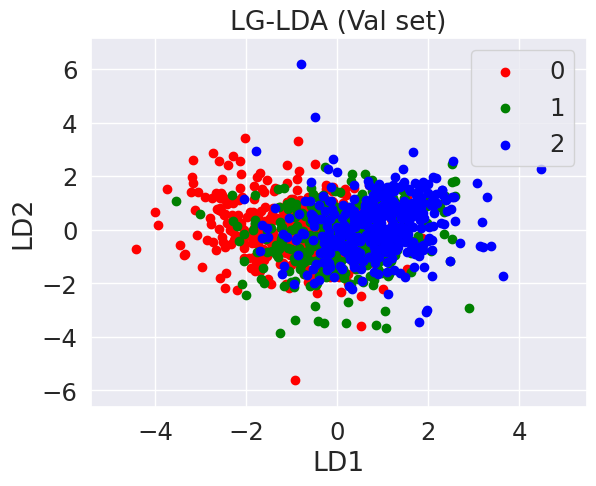

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_val, y_val
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
# plt.contourf(X1, X2, grid.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('LG-LDA (Val set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

In [ ]:
y_pred = mul_lr.predict(X_test)

In [ ]:
# Confusion matrix:
#  [[240  92  40]
#  [ 83 168 127]
#  [ 52 107 226]]
# Accuracy: 0.5586
#               precision    recall  f1-score   support

#            0       0.64      0.65      0.64       372
#            1       0.46      0.44      0.45       378
#            2       0.58      0.59      0.58       385

#     accuracy                           0.56      1135
#    macro avg       0.56      0.56      0.56      1135
# weighted avg       0.56      0.56      0.56      1135


# Confusion matrix:
#  [[241  90  41]
#  [ 84 167 127]
#  [ 57 103 225]]
# Accuracy: 0.5577
#               precision    recall  f1-score   support

#            0       0.63      0.65      0.64       372
#            1       0.46      0.44      0.45       378
#            2       0.57      0.58      0.58       385

#     accuracy                           0.56      1135
#    macro avg       0.56      0.56      0.56      1135
# weighted avg       0.56      0.56      0.56      1135

In [ ]:
from sklearn import metrics
print('Confusion matrix:\n', metrics.confusion_matrix(y_test, y_pred))
print('Accuracy:', np.round(metrics.accuracy_score(y_test, y_pred), 4))
print(metrics.classification_report(y_test, y_pred)) # Better for multiclass problem

Confusion matrix:
 [[241  90  41]
 [ 84 167 127]
 [ 57 103 225]]
Accuracy: 0.5577
              precision    recall  f1-score   support

           0       0.63      0.65      0.64       372
           1       0.46      0.44      0.45       378
           2       0.57      0.58      0.58       385

    accuracy                           0.56      1135
   macro avg       0.56      0.56      0.56      1135
weighted avg       0.56      0.56      0.56      1135



<Axes: >

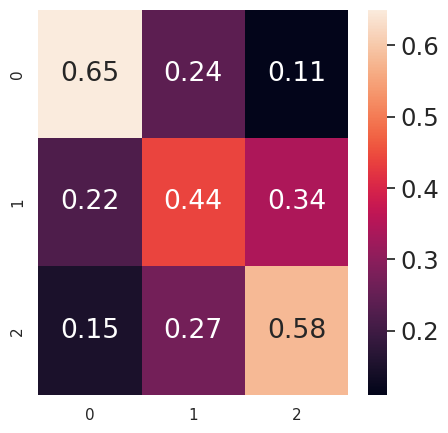

In [ ]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix
import math
cm = confusion_matrix(y_test, y_pred)
cm_norm = (cm / cm.sum(axis=1).reshape(-1,1)).round(decimals = 2)

fig, ax = plt.subplots(figsize=(5,5))        
sns.set(font_scale=1.6)
sns.heatmap(cm_norm, annot=True, ax=ax)

<ipython-input-128-4ba0438ce236>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


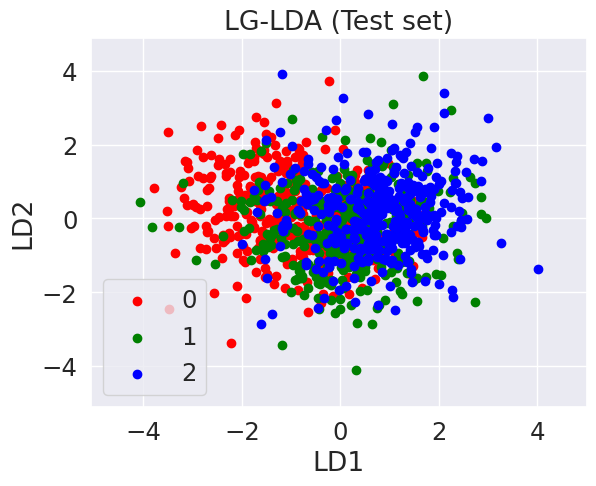

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
# plt.contourf(X1, X2, grid.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('LG-LDA (Test set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,50,200],
              'max_features':[1,3,5,10],
              'min_samples_leaf':[1,2,10],
              'min_samples_split':[1,2,10]
           }
grid = GridSearchCV(rf,param_grid=grid_space,cv=5,scoring='accuracy')
grid.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
720 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/u

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 10, None],
                         'max_features': [1, 3, 5, 10],
                         'min_samples_leaf': [1, 2, 10],
                         'min_samples_split': [1, 2, 10],
                         'n_estimators': [10, 50, 200]},
             scoring='accuracy')

In [ ]:
grid.best_params_

{'max_depth': 3,
 'max_features': 5,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'n_estimators': 10}

In [ ]:
y_pred = grid.predict(X_val)
from sklearn import metrics
print('Confusion matrix:\n', metrics.confusion_matrix(y_val, y_pred))
print('Accuracy:', np.round(metrics.accuracy_score(y_val, y_pred), 4))
print(metrics.classification_report(y_val, y_pred)) # Better for multiclass problem

Confusion matrix:
 [[225  82  65]
 [ 78 144 156]
 [ 31  97 256]]
Accuracy: 0.5511
              precision    recall  f1-score   support

           0       0.67      0.60      0.64       372
           1       0.45      0.38      0.41       378
           2       0.54      0.67      0.59       384

    accuracy                           0.55      1134
   macro avg       0.55      0.55      0.55      1134
weighted avg       0.55      0.55      0.55      1134



<ipython-input-122-6fdd22a0f28c>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


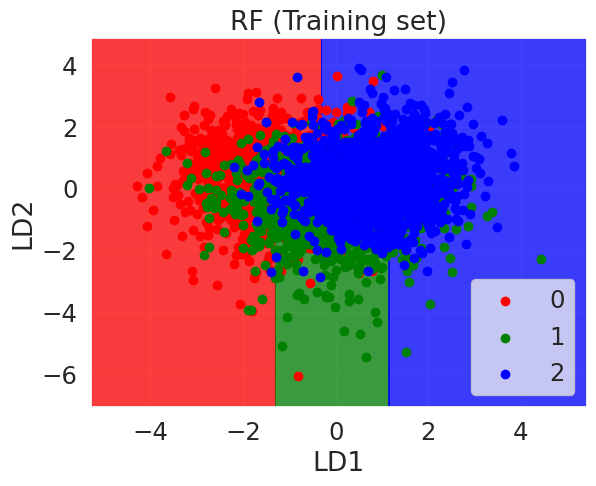

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, grid.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('RF (Training set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

In [ ]:
y_pred = grid.predict(X_test)
from sklearn import metrics
print('Confusion matrix:\n', metrics.confusion_matrix(y_test, y_pred))
print('Accuracy:', np.round(metrics.accuracy_score(y_test, y_pred), 4))
print(metrics.classification_report(y_test, y_pred)) # Better for multiclass problem

Confusion matrix:
 [[240  77  55]
 [ 82 143 153]
 [ 52  88 245]]
Accuracy: 0.5533
              precision    recall  f1-score   support

           0       0.64      0.65      0.64       372
           1       0.46      0.38      0.42       378
           2       0.54      0.64      0.58       385

    accuracy                           0.55      1135
   macro avg       0.55      0.55      0.55      1135
weighted avg       0.55      0.55      0.55      1135



<Axes: >

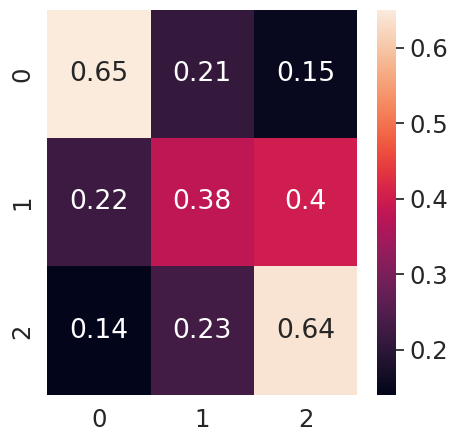

In [ ]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix
import math
cm = confusion_matrix(y_test, y_pred)
cm_norm = (cm / cm.sum(axis=1).reshape(-1,1)).round(decimals = 2)

fig, ax = plt.subplots(figsize=(5,5))        
sns.set(font_scale=1.6)
sns.heatmap(cm_norm, annot=True, ax=ax)

<ipython-input-135-91ba45e98906>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


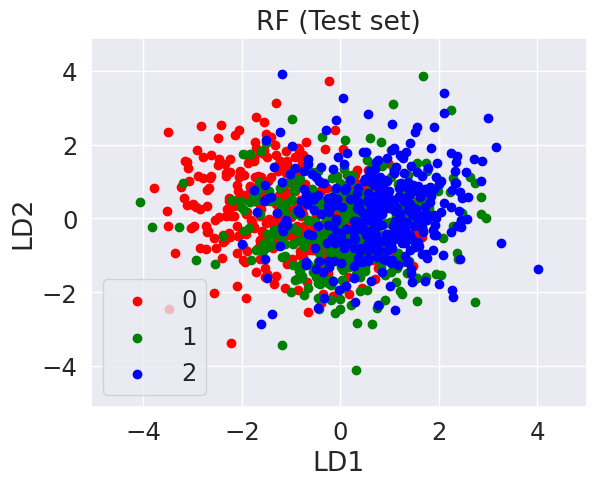

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
# plt.contourf(X1, X2, grid.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
#               alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('RF (Test set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
#load iris dataset
iris = datasets.load_iris()

X = iris.data
y = iris.target
model = LinearDiscriminantAnalysis()
data_plot = model.fit(X, y).transform(X)
target_names = iris.target_names

In [ ]:
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
X_train[0]

array([0.18801445, 0.23512119])

ValueError: ignored

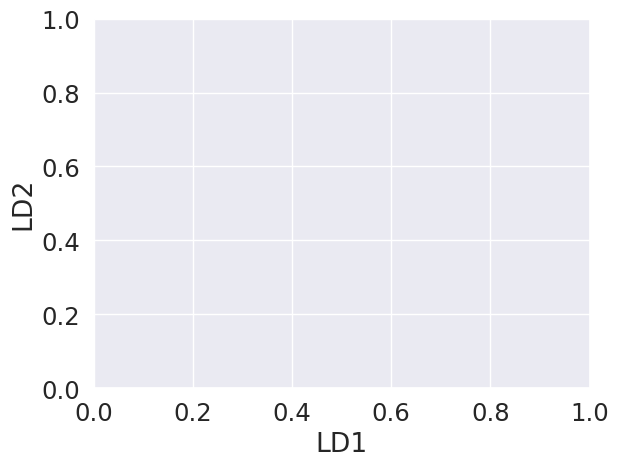

In [ ]:
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_test[:,0],
    X_test[:,1],
    c=y_pred,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

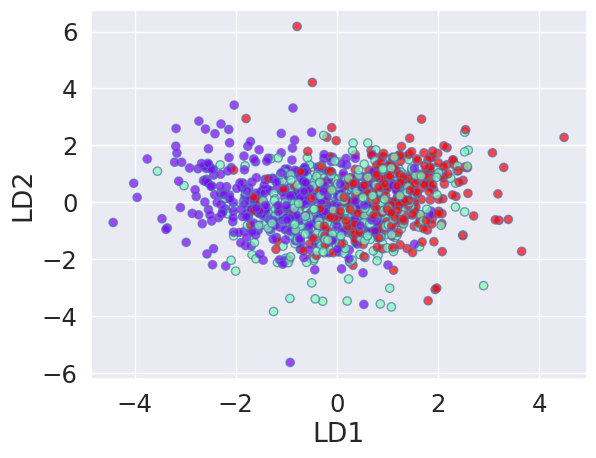

In [ ]:
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_val[:,0],
    X_val[:,1],
    c=y_val,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss_X = StandardScaler()
X_train = ss_X.fit_transform(x_train)
X_val = ss_X.transform(x_val)

In [ ]:
X_train, x_train

In [ ]:
X_train = lda.fit_transform(X_train, y_train)
X_val = lda.transform(X_val)

In [ ]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_val = label_binarizer.transform(y_val)
y_onehot_val.shape  # (n_samples, n_classes)

In [ ]:
y_onehot_val

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(
    y_onehot_val[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nVirginica vs (Setosa & Versicolor)")
plt.legend()
plt.show()

In [ ]:
fpr, tpr, thresholds=metrics.roc_curve(y_val,val_prediction)
roc_auc=metrics.auc(fpr,tpr)
roc_auc
plt.clf()
plt.plot(fpr,tpr,label="ROC curve (are=%0.2f)" % roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.legend(loc="lower right")

In [ ]:
lda = LinearDiscriminantAnalysis()
X_r2 = lda.fit(x_train, y_train).transform(X)

In [ ]:
lda.explained_variance_ratio_

In [ ]:
plt.scatter(X_r2[:,0],X_r2[:,1],c=vectorizer(y))

In [ ]:
pca = PCA(n_components=4)
X_r = pca.fit(X).transform(X)

In [ ]:
from pylab import *
subplot(2,1,1)
title("PCA")
plt.scatter(X_r[:,0],X_r[:,1],c=vectorizer(y))
subplot(2,1,2)
title("LDA")
plt.scatter(X_r2[:,0],X_r2[:,1],c=vectorizer(y))

In [ ]:
import seaborn as sns
df=pd.DataFrame(zip(X_r[:,0],X_r[:,1],X_r2[:,0],X_r2[:,1],y),columns=["pc1","pc2","ld1","ld2","class"])

In [ ]:
mul_lr = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg')
mul_lr.fit(x_train, y_train)

In [ ]:
print("Multinomial Logistic regression Train Accuracy :: ", metrics.accuracy_score(y_train, mul_lr.predict(x_train)))
print("Multinomial Logistic regression Validation Accuracy :: ", metrics.accuracy_score(y_val, mul_lr.predict(x_val)))

In [ ]:
import numpy as np

from sklearn import linear_model
from sklearn.svm import l1_min_c


In [ ]:
cs = l1_min_c(x_train, y_train, loss="log") * np.logspace(0, 7, 16)

clf = linear_model.LogisticRegression(
    penalty="l1",
    solver="newton-cg",
    tol=1e-6,
    max_iter=int(1e6),
    warm_start=True,
    intercept_scaling=10000.0,
)
coefs_ = []
for c in cs:
    clf.set_params(C=c)
    clf.fit(x_train, y_train)
    coefs_.append(clf.coef_.ravel().copy())

coefs_ = np.array(coefs_)

In [ ]:
import matplotlib.pyplot as plt

plt.plot(np.log10(cs), coefs_, marker="o")
ymin, ymax = plt.ylim()
plt.xlabel("log(C)")
plt.ylabel("Coefficients")
plt.title("Logistic Regression Path")
plt.axis("tight")
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier(random_state=42, criterion = 'entropy', max_depth=4, min_samples_split=5)
dt.fit(x_train,y_train)

In [ ]:
fi_col = []
fi = []

for i,column in enumerate(x_train):
    print('The feature importance for {} is : {}'.format(column, dt.feature_importances_[i]))
    
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])

In [ ]:
# Creating a Dataframe
fi_df = zip(fi_col, fi)
fi_df = pd.DataFrame(fi_df, columns = ['Feature','Feature Importance'])
fi_df
# Ordering the data
fi_df = fi_df.sort_values('Feature Importance', ascending = False).reset_index()
# Creating columns to keep
columns_to_keep = fi_df['Feature'][0:40]

fi_df

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Training my model

log_reg = LogisticRegression(penalty='l2',random_state=10, solver = 'newton-cg')

log_reg.fit(x_train, y_train)

In [ ]:
# Methods we can use in Logistic

# predict - Predict class labels for samples in X
log_reg.predict(x_train)
y_pred = log_reg.predict(x_train)

# predict_proba - Probability estimates
pred_proba = log_reg.predict_proba(x_train)

# coef_ - Coefficient of the features in the decision function
log_reg.coef_

# score- Returns the mean accuracy on the given test data and labels - below

In [ ]:
# Accuracy on Train
print("The Training Accuracy is: ", log_reg.score(x_train, y_train))

# Accuracy on Test
print("The Testing Accuracy is: ", log_reg.score(x_val, y_val))


# Classification Report
print(classification_report(y_train, y_pred))

# Multinomial Logistic regression Train Accuracy ::  0.5910464676992822
# Multinomial Logistic regression Validation Accuracy ::  0.5493827160493827

In [ ]:
#Predict on train
train_prediction = log_reg.predict(x_train)
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(y_train, train_prediction))
print ("Accuracy = ", classification_report(y_train, train_prediction))

In [ ]:
#Predict on val
# val_PCA = pca.transform(x_val) 
val_prediction = log_reg.predict(x_val)
#Print overall accuracy
print ("Accuracy = ", metrics.accuracy_score(y_val, val_prediction))
print ("Accuracy = ", classification_report(y_val, val_prediction))

In [ ]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix
import math
cm = confusion_matrix(y_val, val_prediction)
cm_norm = (cm / cm.sum(axis=1).reshape(-1,1)).round(decimals = 2)

fig, ax = plt.subplots(figsize=(5,5))        
sns.set(font_scale=1.6)
sns.heatmap(cm_norm, annot=True, ax=ax)

In [ ]:
log_reg.classes_

In [ ]:
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss

# Running Log loss on training
print("The Log Loss on Training is: ", log_loss(y_train, pred_proba))

# Running Log loss on testing
pred_proba_t = log_reg.predict_proba(x_val)
print("The Log Loss on Validation Dataset is: ", log_loss(y_val, pred_proba_t))

In [ ]:
np.geomspace(1e-5, 1e5, num=20)

In [ ]:
# Creating a range for C values
np.geomspace(1e-5, 1e5, num=20)

# ploting it
plt.plot(np.geomspace(1e-5, 1e5, num=20)) #  uniformly distributed in log space
plt.plot(np.linspace(1e-5, 1e5, num=20)) # uniformly distributed in linear space, instead of log space
# plt.plot(np.logspace(np.log10(1e-5) , np.log10(1e5) , num=20)) # same as geomspace

In [ ]:
# Looping over the parameters

C_List = np.geomspace(1e-5, 1e5, num=20)
CA = []
Logarithmic_Loss = []

for c in C_List:
    log_reg2 = LogisticRegression(random_state=10, solver = 'newton-cg', C=c)
    log_reg2.fit(x_train, y_train)
    score = log_reg2.score(x_val, y_val)
    CA.append(score)
    print("The CA of C parameter {} is {}:".format(c, score))
    pred_proba_t = log_reg2.predict_proba(x_val)
    log_loss2 = log_loss(y_val, pred_proba_t)
    Logarithmic_Loss.append(log_loss2)
    print("The Logg Loss of C parameter {} is {}:".format(c, log_loss2))
    print("")

In [ ]:
# putting the outcomes in a Table

# reshaping
CA2 = np.array(CA).reshape(20,)
Logarithmic_Loss2 = np.array(Logarithmic_Loss).reshape(20,)

# zip
outcomes = zip(C_List, CA2, Logarithmic_Loss2)

#df
df_outcomes = pd.DataFrame(outcomes, columns = ["C_List", 'CA2','Logarithmic_Loss2'])

#print
df_outcomes

# Ordering the data (sort_values)
df_outcomes.sort_values("Logarithmic_Loss2", ascending = True).reset_index()

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold
kf = KFold(n_splits=3, random_state=0, shuffle=True)

# Logistic Reg CV
Log_reg3 = LogisticRegressionCV(random_state=15, Cs = C_List, solver ='newton-cg')
Log_reg3.fit(x_train, y_train)
print("The CA is:", Log_reg3.score(x_val, y_val))
pred_proba_t = Log_reg3.predict_proba(x_val)
log_loss3 = log_loss(y_val, pred_proba_t)
print("The Logistic Loss is: ", log_loss3)

print("The optimal C parameter is: ", Log_reg3.C_)

In [ ]:
# Final Model 

log_reg3 = LogisticRegression(random_state=10, solver = 'lbfgs', C=784.759970,max_iter=1000)
log_reg3.fit(x_train, y_train)
score = log_reg3.score(x_test, y_test)

pred_proba_t = log_reg3.predict_proba(x_test)
log_loss2 = log_loss(y_test, pred_proba_t)

print("Testing Acc:", score)
print("Log Loss:", log_loss2)